In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = 'C:/Users/COMPUMARTS/Downloads/DEPI/Depi_Amit_BNS3_AIS4_S1/data preprocessing/train 1.csv'

df  = pd.read_csv(path)
# df.head()

In [3]:
df.drop(['PassengerId','Name','Ticket'], axis=1,inplace=True)

In [4]:
# from read_files import read_file
# read_file(path)

In [5]:
def chk_types(df):
    dtypes =df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({"Dtypes":dtypes,"Num_uniques":n_unique}).T

In [6]:
# from process import chk_types
# chk_types(df)

In [7]:
cols = ['Survived','Pclass','Parch','Sex','Embarked','SibSp']


df[cols] = df[cols].astype('category')
chk_types(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,category,category,category,float64,category,category,float64,object,category
Num_uniques,2,3,2,88,7,7,248,147,3


In [8]:
df.shape[0]

891

In [9]:
null = df.isnull().sum()
ratio = round( (null /df.shape[0])*100 ,2).astype(str) +"%"
pd.DataFrame({"Null_sum": null, "Ratio %": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null_sum,0,0,0,177,0,0,0,687,2
Ratio %,0.0%,0.0%,0.0%,19.87%,0.0%,0.0%,0.0%,77.1%,0.22%


In [10]:
df1 = df.dropna(subset=['Embarked'], inplace= True)
df2 = df.drop("Cabin", axis=1, inplace= True)


In [11]:
median =  df['Age'].median()
df['Age'].fillna(median, inplace= True)

In [12]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [13]:
null = df.isnull().sum()
ratio = round( (null /df.shape[0])*100 ,2).astype(str) +"%"
pd.DataFrame({"Null_sum": null, "Ratio %": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null_sum,0,0,0,0,0,0,0,0
Ratio %,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt


In [15]:
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Age', 'Fare'], dtype='object')

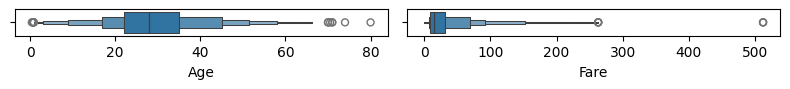

In [16]:
plt.figure(figsize=(8,1))
for i, col in enumerate(num_cols):
    plt.subplot(1 ,2 , i+1)
    sns.boxenplot(df[col],orient='h')
plt.tight_layout()
plt.show()

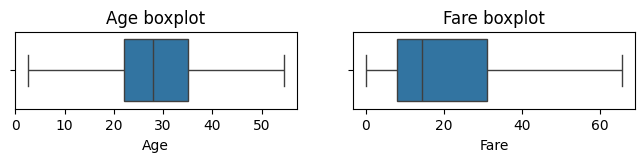

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    lower_outliers = df[df[col] < lower_bound][col].values
    upper_outliers = df[df[col] > upper_bound][col].values
    df[col].replace(lower_outliers, lower_bound, inplace=True)
    df[col].replace(upper_outliers, upper_bound, inplace=True)


plt.figure(figsize=(8, 1))
for idx, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), idx + 1)
    sns.boxplot(df[col], orient='h')
    plt.title(f"{col} boxplot")

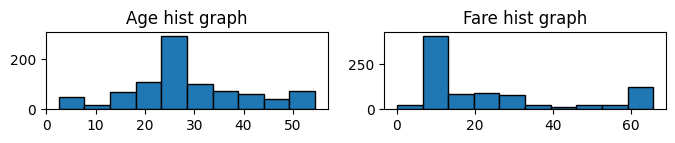

In [18]:
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    plt.hist(df[col],edgecolor='black')
    plt.title(f'{col} hist graph')

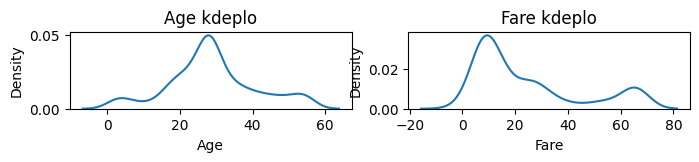

In [19]:
plt.figure(figsize=(8,1))
for i , col in enumerate(num_cols):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df[col])
    plt.title(f'{col} kdeplo')

In [20]:
cat_cols=df.select_dtypes('category').columns
cat_cols

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked'], dtype='object')

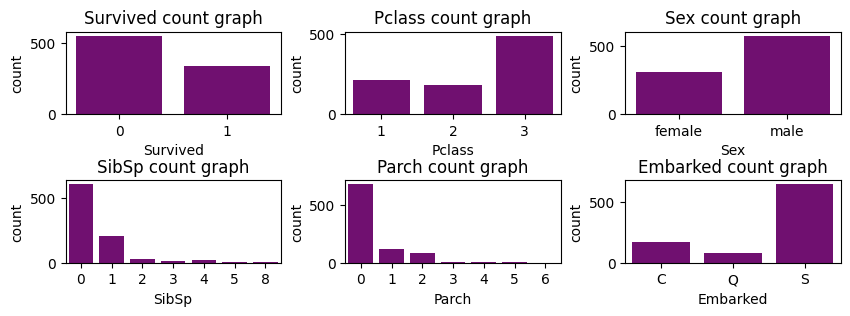

In [37]:
plt.figure(figsize=(10,3))
for i , col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x=col,data=df,color='purple')
    plt.title(f'{col} count graph')
plt.subplots_adjust(hspace=.8,wspace=.3)
plt.show()

In [47]:
unique=df['Survived'].value_counts()
count=unique.values
cat=unique.index
cat

CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category', name='Survived')

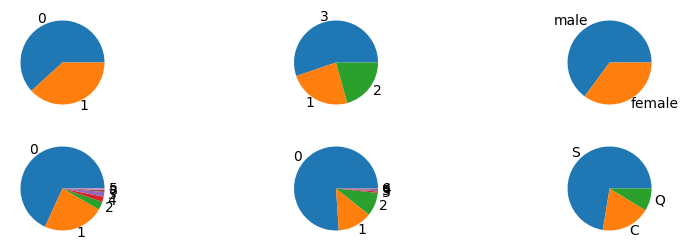

In [51]:
plt.figure(figsize=(10,3))
for i , col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    unique=df[col].value_counts()
    count=unique.values
    categories=unique.index
    plt.pie(count,labels=categories)
    